<a href="https://colab.research.google.com/github/Suratan63011017/Diabetes-Project/blob/main/Diabetes_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
url = "https://raw.githubusercontent.com/Suratan63011017/LinearAlgebraProject/main/diabetes.csv"
diabetes_data = pd.read_csv(url)
diabetes_data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1                        0.233   23        0  
2                        0.630   31        1  
3                        0.365   24        1  
4                        0.536   21        0  
...                        ...  ...      ...  
1995                     0.370   33        0  
1996                     0.719   36        1  
1997                     0.382   42        0  
1998                     0.319   26        1  
1999                     0.547   25        0  

[2000 rows x 9 columns]

In [3]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [4]:
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
diabetes_data = diabetes_data.drop(columns=['SkinThickness','Insulin'])
diabetes_data


Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  \
0               2      138             62  33.6                     0.127   
1               0       84             82  38.2                     0.233   
2               0      145              0  44.2                     0.630   
3               0      135             68  42.3                     0.365   
4               1      139             62  40.7                     0.536   
...           ...      ...            ...   ...                       ...   
1995            2       75             64  29.7                     0.370   
1996            8      179             72  32.7                     0.719   
1997            6       85             78  31.2                     0.382   
1998            0      129            110  67.1                     0.319   
1999            2       81             72  30.1                     0.547   

      Age  Outcome  
0      47        1  
1      23        0  
2      31        1  
3      24        1  
4      21        0  
...   ...      ...  
1995   33        0  
1996   36        1  
1997   42        0  
1998   26        1  
1999   25        0  

[2000 rows x 7 columns]

In [6]:
diabetes_data = diabetes_data.drop(diabetes_data.index[diabetes_data['BloodPressure']==0])
diabetes_data = diabetes_data.drop(diabetes_data.index[diabetes_data['BMI']==0])
diabetes_data = diabetes_data.drop(diabetes_data.index[diabetes_data['Glucose']==0])
diabetes_data

Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  \
0               2      138             62  33.6                     0.127   
1               0       84             82  38.2                     0.233   
3               0      135             68  42.3                     0.365   
4               1      139             62  40.7                     0.536   
5               0      173             78  46.5                     1.159   
...           ...      ...            ...   ...                       ...   
1995            2       75             64  29.7                     0.370   
1996            8      179             72  32.7                     0.719   
1997            6       85             78  31.2                     0.382   
1998            0      129            110  67.1                     0.319   
1999            2       81             72  30.1                     0.547   

      Age  Outcome  
0      47        1  
1      23        0  
3      24        1  
4      21        0  
5      58        0  
...   ...      ...  
1995   33        0  
1996   36        1  
1997   42        0  
1998   26        1  
1999   25        0  

[1888 rows x 7 columns]

In [7]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1888 non-null   int64  
 1   Glucose                   1888 non-null   int64  
 2   BloodPressure             1888 non-null   int64  
 3   BMI                       1888 non-null   float64
 4   DiabetesPedigreeFunction  1888 non-null   float64
 5   Age                       1888 non-null   int64  
 6   Outcome                   1888 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 118.0 KB


In [8]:
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
diabetes_data.describe().T

count        mean        std     min     25%  \
Pregnancies               1888.0    3.742055   3.304971   0.000   1.000   
Glucose                   1888.0  122.163665  30.784603  44.000  99.000   
BloodPressure             1888.0   72.423729  12.255992  24.000  64.000   
BMI                       1888.0   32.655508   7.196732  18.200  27.500   
DiabetesPedigreeFunction  1888.0    0.472931   0.323601   0.078   0.245   
Age                       1888.0   33.217691  11.780350  21.000  24.000   
Outcome                   1888.0    0.338453   0.473309   0.000   0.000   

                             50%      75%     max  
Pregnancies                 3.00    6.000   17.00  
Glucose                   117.00  142.000  199.00  
BloodPressure              72.00   80.000  122.00  
BMI                        32.40   36.800   80.60  
DiabetesPedigreeFunction    0.38    0.624    2.42  
Age                        29.00   40.250   81.00  
Outcome                     0.00    1.000    1.00

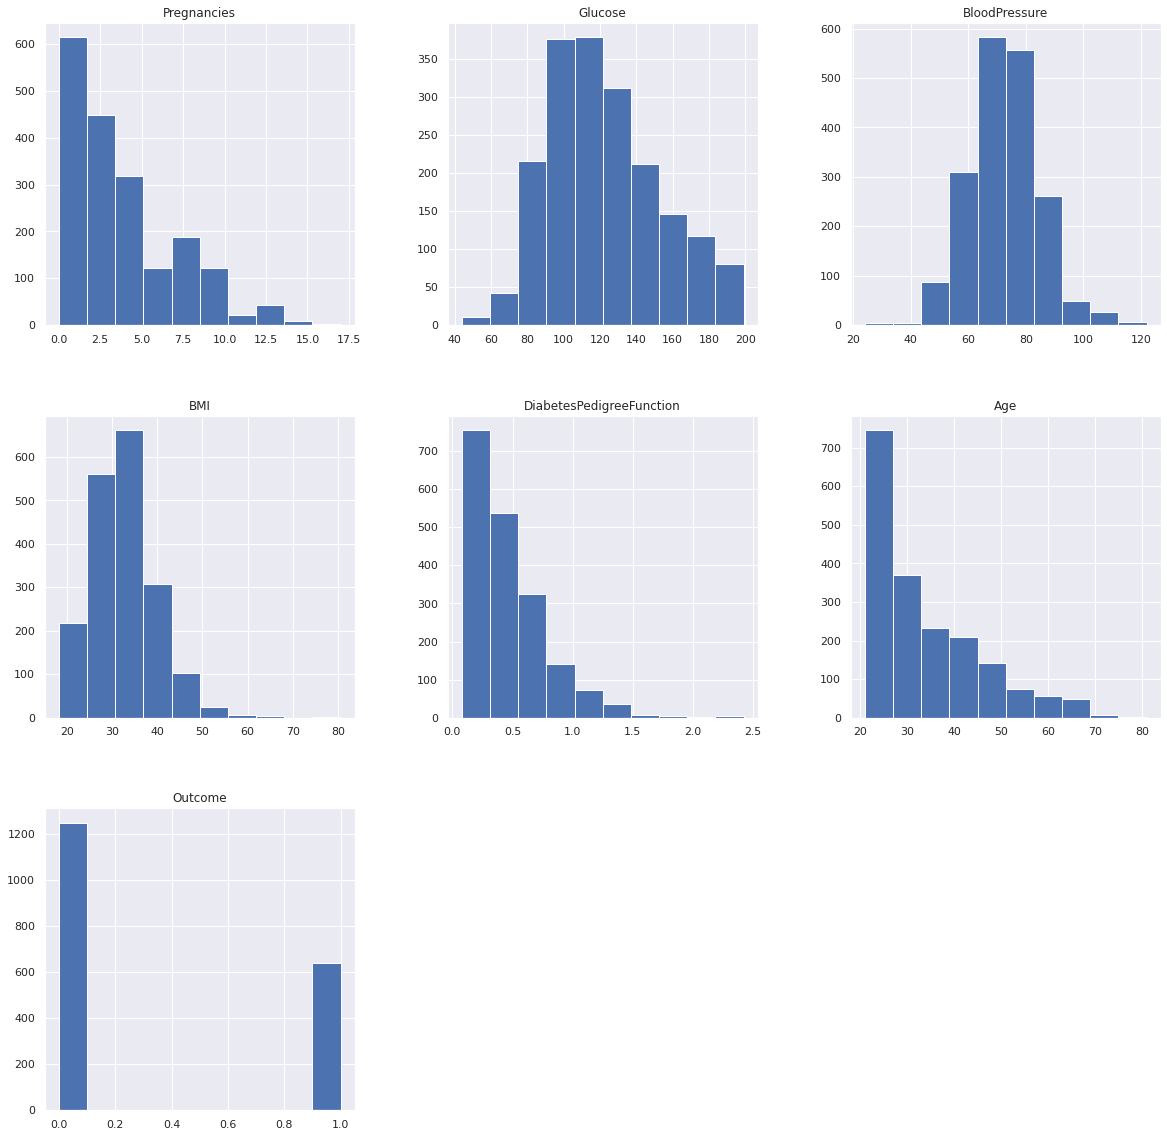

In [10]:
p = diabetes_data.hist(figsize = (20,20))

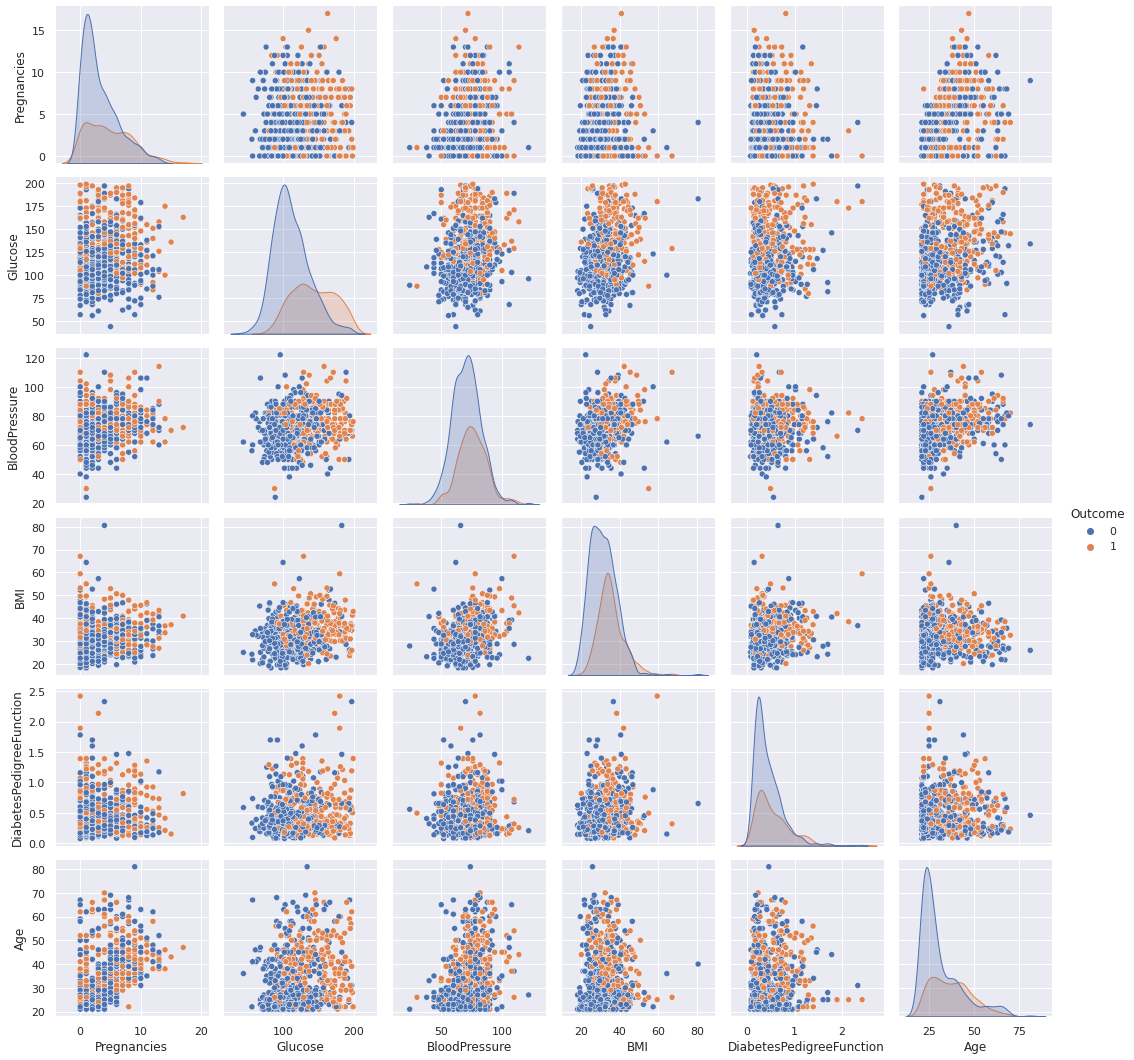

In [11]:
p=sns.pairplot(diabetes_data, hue = 'Outcome')

Correlation between various features


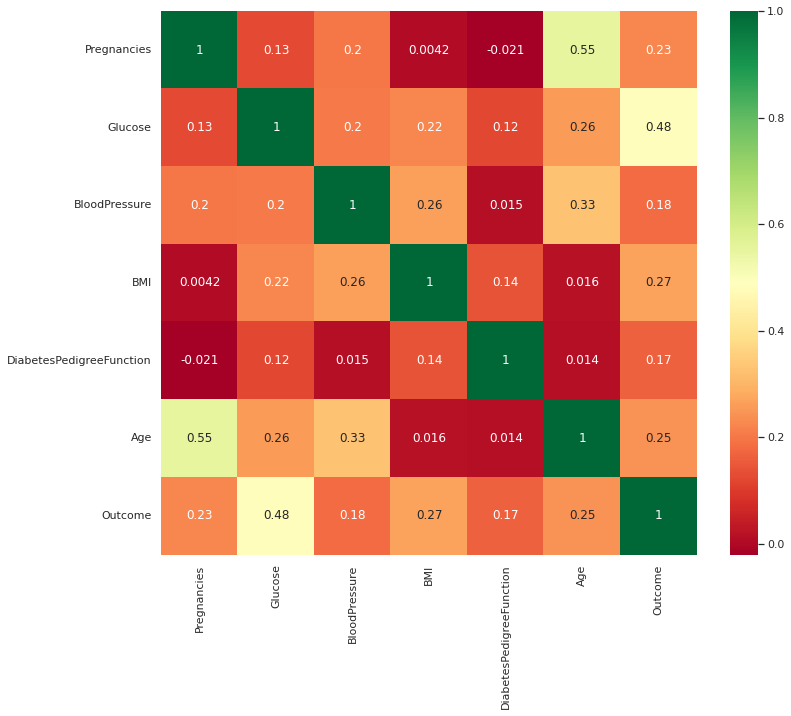

In [12]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')

In [13]:
# independent variable
x = diabetes_data.iloc[ : , : -1]

# dependent variable
y = diabetes_data.Outcome

In [14]:
#แบ่งค่าเป็น training set และ test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=326)

#ส่วนโมเดล & วัดประสิทธิภาพ
model = LogisticRegression(max_iter=120)
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print(f"The model correctly classifies with {score*100:.2f}% accuracy.")
y_pred = model.predict(x_test)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm

The model correctly classifies with 80.95% accuracy.


0   1
0  239  25
1   47  67

In [15]:
print(f"The model predicts disease with the following accuracy:\n\n\
Healthy people - classified as\n\t\
No disease = {cm[0][0]}/{cm.loc[0].sum()}\n\tDisease = {cm[1][0]}/{cm.loc[0].sum()}\n\n\
\
Sick people - diabetic - classified as\n\t\
No disease = {cm[0][1]}/{cm.loc[1].sum()}\n\tDisease = {cm[1][1]}/{cm.loc[1].sum()}")

The model predicts disease with the following accuracy:

Healthy people - classified as
	No disease = 239/264
	Disease = 25/264

Sick people - diabetic - classified as
	No disease = 47/114
	Disease = 67/114


In [16]:
1# Pregnancies: Number of times pregnant
#PREGNANCIES = int(diabetes_data.Pregnancies.mean())
PREGNANCIES = int(input("PREGNANCIES : "))

# Plasma glucose concentration over 2 hours in an oral glucose tolerance test 
#GLUCOSE = int(diabetes_data.Glucose.mean())
GLUCOSE = int(input("GLUCOSE : "))

# Diastolic blood pressure (mm Hg)
#BLOODPRESSURE = int(diabetes_data.BloodPressure.mean())
BLOODPRESSURE = int(input("BLOODPRESSURE : "))

# Body mass index (weight in kg/(height in m)2)
#BMI = diabetes_data.BMI.mean()
BMI = float(input("BMI : "))

# DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
#DIABETESPEDIGREEFUNCTION = diabetes_data.DiabetesPedigreeFunction.mean()
DIABETESPEDIGREEFUNCTION = float(input("DIABETESPEDIGREEFUNCTION : "))

# Age (years)
#AGE = int(diabetes_data.Age.mean())
AGE = int(input("AGE : "))


PREGNANCIES : 11
GLUCOSE : 11
BLOODPRESSURE : 11
BMI : 11
DIABETESPEDIGREEFUNCTION : 11
AGE : 11


In [17]:
sample = {
    'Pregnancies': PREGNANCIES, 
    'Glucose': GLUCOSE, 
    'Bloodpressure': BLOODPRESSURE, 
    'Bmi': BMI, 
    'Diabetespedigreefunction': DIABETESPEDIGREEFUNCTION, 
    'Age':AGE,
}

In [18]:
if None in sample.values():
    print("Please do not leave any variable with the 'None' value.")
else:
    trial = pd.DataFrame.from_dict(data=sample, orient='index').T
    print(f"Outcome: {model.predict(trial)[0]} - (0 if non-diabetic, 1 if diabetic)")
    print(f"The probability of no disease {model.predict_proba(trial)[0][0]*100:.2f}%\nThe probability of disease {model.predict_proba(trial)[0][1]*100:.2f}%")

Outcome: 1 - (0 if non-diabetic, 1 if diabetic)
The probability of no disease 1.36%
The probability of disease 98.64%
